(256, 256, 3)


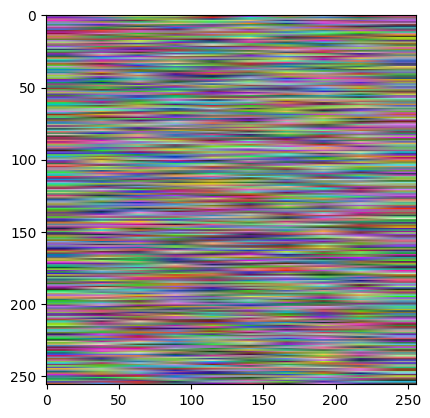

In [34]:
from src.dl_data_pipeline.validator import TypeValidator, ShapeValidator, MinMaxValidator, MeanVarValidator
from src.dl_data_pipeline.pipeline.pipe_node import PipeNode
from src.dl_data_pipeline.pipeline.data_pipeline import Pipeline
from src.dl_data_pipeline import deferred_execution
from src.dl_data_pipeline.process_functions import (any_process, process_2d)
import numpy as np

@deferred_execution
def print_infos(x):
    print(x.shape)
    return x

input1 = PipeNode(name = "Input1")
x = any_process.rescale(input1, 0, 1)
x = process_2d.resize_with_max_distortion(x, (256, 256), 0.5)
x = print_infos(x)
x = process_2d.padding_2d(x, (256, 256), 0)

pipe = Pipeline([input1], x)
pipe.add_validator(TypeValidator(np.ndarray), 0)
pipe.add_validator(ShapeValidator((256, 256, 3)), 0)

import matplotlib.pyplot as plt
plt.imshow(pipe(np.random.rand(1920, 1080, 3)))

In [22]:
import subprocess
import os

MIN_COVER = 75
log_path = os.path.normpath("test/test.log")
if os.path.exists(log_path):
    os.remove(log_path)
result = subprocess.run(
    ["python3", "-m", "pytest", "--cov=src", "--cov-report=html:test/htmlcov", f"--cov-fail-under={MIN_COVER}", "test/"],
    stdout=open(log_path, "w"),stderr=subprocess.STDOUT)
exc = result.returncode
if exc != 0:
    print(f"Test fails. Exit code {exc}")
    print(f"Check log file : {log_path} for more info")
else:
    if os.name == 'nt':
        os.startfile(os.path.normpath("test/htmlcov/index.html"))
    elif os.name == 'posix':
        subprocess.run(["open", "test/htmlcov/index.html"])

Test fails. Exit code 1
Check log file : test/test.log for more info


In [19]:
from src.dl_data_pipeline import deferred
from src.dl_data_pipeline import Pipeline, DATA_PLACEHOLDER as DP
from src.dl_data_pipeline import process_functions
import numpy as np


# deferred.use_deferred_execution()

pipe = Pipeline()
pipe.add_forward_process(process_functions.any_process.rescale, 0, 1)

pipe.forward(np.random.rand(10)*50)

array([0.9695446 , 0.03420365, 1.        , 0.90440622, 0.00927965,
       0.78291949, 0.23193117, 0.89277142, 0.        , 0.58972763])